# 课堂练习

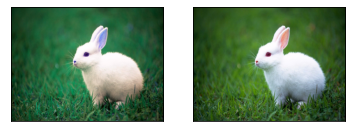

In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("rabit.jpg")
b,g,r = cv2.split(img)
img2 = cv2.merge([r,g,b])
plt.subplot(121);plt.imshow(img) # expects distorted color
plt.xticks([]), plt.yticks([])
plt.subplot(122);plt.imshow(img2) # expect true color
plt.xticks([]), plt.yticks([])
plt.show()

# cv2.imshow('bgr image',img) # expects true color
# cv2.imshow('rgb image',img2) # expects distorted color
# cv2.waitKey(0)
# cv2.destroyAllWindows()

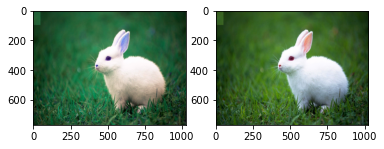

In [11]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("rabit.jpg")
b,g,r = cv2.split(img)
img[0:100,0:50]=img[100:200,200:250] 
img2 = cv2.merge([r,g,b])
img2[0:100,0:50]=img2[100:200,200:250] 
plt.subplot(121);plt.imshow(img) # expects distorted color
plt.subplot(122);plt.imshow(img2) # expect true color
plt.show()

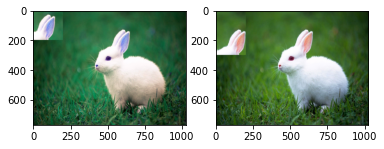

In [29]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("rabit.jpg")
b,g,r = cv2.split(img)
img[0:200,0:200]=img[100:300,500:700]
img2 = cv2.merge([r,g,b])
img2[0:300,0:200]=img2[0:300,450:650] 
plt.subplot(121);plt.imshow(img) # expects distorted color
plt.subplot(122);plt.imshow(img2) # expect true color
plt.show()

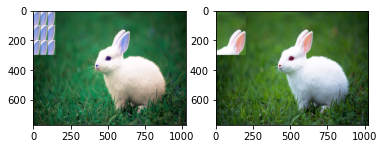

In [34]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("rabit.jpg")
b,g,r = cv2.split(img)
for i in range(1,4):
    for j in range(1,4):
        img[100*(i-1):100*i,50*(j-1):50*j]=img[150:250,600:650]
        
img2 = cv2.merge([r,g,b])
img2[0:300,0:200]=img2[0:300,450:650] 
plt.subplot(121);plt.imshow(img) # expects distorted color
plt.subplot(122);plt.imshow(img2) # expect true color
plt.show()

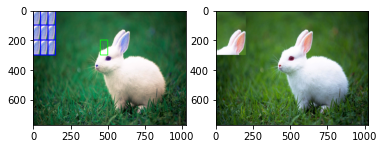

In [38]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("rabit.jpg")
b,g,r = cv2.split(img)
for i in range(1,4):
    for j in range(1,4):
        img[100*(i-1):100*i,50*(j-1):50*j]=img[150:250,600:650]
        cv2.rectangle(img,(50*(j-1),100*i),(50*j,100*(i-1)),(0,0,255),5)
cv2.rectangle(img,(450,300),(500,200),(0,255,0),3)
img2 = cv2.merge([r,g,b])
img2[0:300,0:200]=img2[0:300,450:650] 
plt.subplot(121);plt.imshow(img) # expects distorted color
plt.subplot(122);plt.imshow(img2) # expect true color
plt.show()

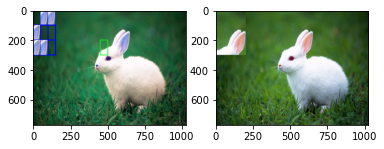

In [42]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import random

img = cv2.imread("rabit.jpg")
b,g,r = cv2.split(img)
for i in range(1,4):
    for j in range(1,4):
        cv2.rectangle(img,(50*(j-1),100*i),(50*j,100*(i-1)),(0,0,255),5)
        if random.randint(1,9)>5:
            img[100*(i-1):100*i,50*(j-1):50*j]=img[150:250,600:650]
cv2.rectangle(img,(450,300),(500,200),(0,255,0),3)        
img2 = cv2.merge([r,g,b])
img2[0:300,0:200]=img2[0:300,450:650] 
plt.subplot(121);plt.imshow(img) # expects distorted color
plt.subplot(122);plt.imshow(img2) # expect true color
plt.show()

In [ ]:
import numpy as np
import cv2
import random


while True:
    img = cv2.imread("rabit.jpg")
    for i in range(1,4):
        for j in range(1,4):
            if random.randint(1,9)>5:
                img[100*(i-1):100*i,50*(j-1):50*j]=img[150:250,600:650]
            cv2.rectangle(img,(50*(j-1),100*i),(50*j,100*(i-1)),(255,0,0),5)
    cv2.imshow('bgr image',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# 作业
设计一个打地鼠游戏，每秒地鼠位置改变一次，50%的概率出现。  如果鼠标左键双击位置和正好有地鼠，则加10分，否则减2分。 满100分则打印"sucess" 退出整个程序。
提示：参考第7章，28页。 鼠标当画笔里面的代码
作业提示： chessboard=[[0,0,0],[0,0,0],[0,0,0]]  双重列表代表棋盘。 为0没有地鼠，为1有地鼠。

In [3]:
import cv2
import numpy as np
import random

# 初始化棋盘
chessboard = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]

# 初始化分数
score = 0

# 创建窗口
cv2.namedWindow('image')

# 鼠标回调函数
def on_mouse(event, x, y, flags, param):
    global score
    if event == cv2.EVENT_LBUTTONDBLCLK:
        # 计算点击位置对应的棋盘坐标
        x = x // 100
        y = y // 100

        # 判断是否击中地鼠
        if chessboard[x][y] == 1:
            score += 10
            print('Hit! Score: ', score)
        else:
            score -= 2
            print('Miss! Score: ', score)

# 设置鼠标回调函数
cv2.setMouseCallback('image', on_mouse)

while True:
    # 每秒更新一次地鼠位置
    cv2.waitKey(1000)

    # 随机生成地鼠位置
    for i in range(3):
        for j in range(3):
            chessboard[i][j] = random.choice([0, int(random.random() > 0.5)])

    # 显示棋盘
    img = np.zeros((300, 300), dtype=np.uint8)
    for i in range(3):
        for j in range(3):
            if chessboard[i][j] == 1:
                cv2.circle(img, (i * 100 + 50, j * 100 + 50), 30, (255), -1)
    cv2.imshow('image', img)

    # 判断是否达到100分
    if score >= 100:
        print('Success!')
        break

cv2.destroyAllWindows()

Hit! Score:  10
Hit! Score:  20
Hit! Score:  30
Hit! Score:  40
Miss! Score:  38
Hit! Score:  48
Hit! Score:  58
Hit! Score:  68
Hit! Score:  78
Hit! Score:  88
Hit! Score:  98
Miss! Score:  96
Hit! Score:  106
Success!
